Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# 구글 드라이브에 영구 설치했던 라이브러리 마운트/경로설정

import os, sys   

from google.colab import drive
drive.mount('/content/drive')

pg_path = '/content/packages'  

os.symlink('/content/drive/My Drive/Colab Notebooks/Python_Libraries', pg_path)  
sys.path.insert(0, pg_path)


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Sook-Tat/kaggle_project/여행상품/train.csv", index_col=0)

In [ ]:
df

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.000000,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.000000,0
1,2,34.0,Self Enquiry,3,15.524015,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.000000,1
2,3,45.0,Company Invited,1,15.524015,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,23624.108895,0
3,4,29.0,Company Invited,1,7.000000,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.000000,1
4,5,42.0,Self Enquiry,3,6.000000,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.000000,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.000000,0
1951,1952,41.0,Self Enquiry,3,8.000000,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.000000,0
1952,1953,38.0,Company Invited,3,28.000000,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.000000,0
1953,1954,28.0,Self Enquiry,3,30.000000,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.000000,0


## 결측치 처리
- Age(37)
- DurationOfPitch(9 / 평균 / 중앙값 중 성능 좋은 것으로)
- NumberOfFollowups(4)
- PreferredPropertyStar(3)
- NumberOfTrips(3)
- NumberOfChildrenVisiting(1)
- MonthlyIncome (평균)
- TypeofContact(범주형) -> 'Unknown'으로 대체

In [4]:
df.Age = df.Age.fillna(37)
df.NumberOfFollowups = df.NumberOfFollowups.fillna(4)
df.NumberOfTrips = df.NumberOfTrips.fillna(3)
df.PreferredPropertyStar = df.PreferredPropertyStar.fillna(3)
df.NumberOfChildrenVisiting = df.NumberOfChildrenVisiting.fillna(1)
df.MonthlyIncome = df.MonthlyIncome.fillna(df.MonthlyIncome.mean())
df.DurationOfPitch = df.DurationOfPitch.fillna(df.DurationOfPitch.mean())#DurationOfPitch(9 / 평균 / 중앙값 중 성능 좋은 것으로)
df.TypeofContact = df.TypeofContact.fillna('Unknown')

- Fe Male -> Female

In [6]:
df.loc[df['Gender'] == 'Fe Male', 'Gender'] = 'Female'

## 이상치 처리
그대로 (변경 없음) 

In [7]:
# 전처리 완료 파일 
df.to_csv("./최종전처리완료.csv")

## 모델링 
- logistic regression
- CatBoost Classifier

In [8]:
df = pd.read_csv("/content/최종전처리완료.csv")

### 가변수 생성 

In [9]:
pd.set_option('display.max_columns', 60)

dums = pd.get_dummies(df.drop(columns=['id']), drop_first = True)
dums.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,28.0,1,10.000000,3,4.0,3.0,3.0,0,1,0,1.0,20384.000000,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,34.0,3,15.524015,2,4.0,4.0,1.0,1,5,1,0.0,19599.000000,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,45.0,1,15.524015,2,3.0,4.0,2.0,0,4,1,0.0,23624.108895,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0
3,29.0,1,7.000000,3,5.0,4.0,3.0,0,4,0,1.0,21274.000000,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,42.0,3,6.000000,2,3.0,3.0,2.0,0,3,1,0.0,19907.000000,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0


### train, valid set 나누기

In [10]:
from sklearn.model_selection import train_test_split 

train_X, valid_X, train_y, valid_y = train_test_split(dums.drop(columns=['ProdTaken']), dums['ProdTaken'], test_size=0.3, random_state = 42)


### 연속형 scailing
이상치 영향을 최소화시켜주는 RobustScaler 사용

In [11]:
from sklearn.preprocessing import RobustScaler
연속형 = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore',
       'NumberOfChildrenVisiting', 'MonthlyIncome']
robustScaler = RobustScaler()
print(robustScaler.fit(train_X[연속형]))
train_X_robusted = pd.DataFrame(robustScaler.transform(train_X[연속형]), columns=[연속형])
valid_X_robusted = pd.DataFrame(robustScaler.transform(valid_X[연속형]), columns=[연속형])
train_X_robusted

RobustScaler()


,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
0,-0.416667,0.8,1.0,0.0,0.0,0.0,0.5,0.0,-0.276580
1,1.333333,-0.2,1.0,0.0,1.0,-0.5,0.5,1.0,0.950889
2,1.666667,1.6,1.0,0.0,1.0,1.5,0.5,2.0,1.993270
3,-0.416667,-0.5,0.0,0.0,0.0,0.0,-1.0,0.0,1.246608
4,-0.750000,0.8,0.0,-3.0,2.0,-1.0,1.0,0.0,-0.408455
...,...,...,...,...,...,...,...,...,...
1363,1.000000,0.0,0.0,0.0,1.0,-0.5,-1.0,-1.0,-0.520139
1364,0.166667,0.1,0.0,-1.0,1.0,-1.0,-1.0,-1.0,-0.172679
1365,-0.833333,-0.5,0.0,0.0,0.0,-0.5,-0.5,1.0,-1.059417
1366,-1.333333,-0.8,0.0,0.0,1.0,-0.5,1.0,1.0,-1.141866


In [12]:
train_X_scaled = pd.concat([train_X.drop(columns=연속형).reset_index(), train_X_robusted], axis=1).drop(columns=['index'])
valid_X_scaled = pd.concat([valid_X.drop(columns=연속형).reset_index(), valid_X_robusted], axis=1).drop(columns=['index'])

In [ ]:
train_X_scaled

,CityTier,Passport,OwnCar,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,"(Age,)","(DurationOfPitch,)","(NumberOfPersonVisiting,)","(NumberOfFollowups,)","(PreferredPropertyStar,)","(NumberOfTrips,)","(PitchSatisfactionScore,)","(NumberOfChildrenVisiting,)","(MonthlyIncome,)"
0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,-0.416667,0.8,1.0,0.0,0.0,0.0,0.5,0.0,-0.276580
1,3,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1.333333,-0.2,1.0,0.0,1.0,-0.5,0.5,1.0,0.950889
2,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1.666667,1.6,1.0,0.0,1.0,1.5,0.5,2.0,1.993270
3,3,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,-0.416667,-0.5,0.0,0.0,0.0,0.0,-1.0,0.0,1.246608
4,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,-0.750000,0.8,0.0,-3.0,2.0,-1.0,1.0,0.0,-0.408455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1.000000,0.0,0.0,0.0,1.0,-0.5,-1.0,-1.0,-0.520139
1364,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0.166667,0.1,0.0,-1.0,1.0,-1.0,-1.0,-1.0,-0.172679
1365,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,-0.833333,-0.5,0.0,0.0,0.0,-0.5,-0.5,1.0,-1.059417
1366,3,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,-1.333333,-0.8,0.0,0.0,1.0,-0.5,1.0,1.0,-1.141866


### 모델링
#### logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


In [14]:
logit_reg = LogisticRegression(penalty='l2', C=100, solver='liblinear') # Ridge Regression
## lamnda 값을 얼마로 줘야할지 모르겠음 
## 근데 한 10 이상 주면 10000까지 valid accuracy가 0.8296으로 동일햇음

logit_reg.fit(train_X_scaled, train_y)

coeff = pd.DataFrame({'coeff':logit_reg.coef_[0]}, index=train_X_scaled.columns).transpose()
print('intercept ', logit_reg.intercept_[0])
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X_scaled), df=len(train_X.columns) + 1))
# AIC Score가 낮을수록 적합도 높음

intercept  -2.4763495382888836
AIC 688.9291679182027


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
coeff.transpose()

,coeff
CityTier,0.591352
Passport,1.763049
OwnCar,-0.067372
TypeofContact_Self Enquiry,-0.143221
TypeofContact_Unknown,0.334713
Occupation_Large Business,-0.507510
Occupation_Salaried,-0.957739
Occupation_Small Business,-1.016118
Gender_Male,0.091450
ProductPitched_Deluxe,-0.488478


In [15]:
classificationSummary(train_y, logit_reg.predict(train_X_scaled))
classificationSummary(valid_y, logit_reg.predict(valid_X_scaled))

Confusion Matrix (Accuracy 0.8553)

       Prediction
Actual    0    1
     0 1074   33
     1  165   96
Confusion Matrix (Accuracy 0.8296)

       Prediction
Actual   0   1
     0 449  16
     1  84  38


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [16]:
logit_reg_pred = logit_reg.predict(valid_X_scaled)
logit_reg_proba = logit_reg.predict_proba(valid_X_scaled)
logit_result = pd.DataFrame({'actual' : valid_y,
                            'p(0)' : [p[0] for p in logit_reg_proba], # P(Credit_Card==0) (경향/확률)
                            'p(1)' : [p[1] for p in logit_reg_proba], # P(Credit_Card==1)
                            'predicted' : logit_reg_pred })

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
logit_result

,actual,p(0),p(1),predicted
1618,0,0.576199,0.423801,0
1811,1,0.575477,0.424523,0
1336,0,0.937719,0.062281,0
1058,1,0.481638,0.518362,1
307,0,0.949815,0.050185,0
...,...,...,...,...
1552,0,0.992187,0.007813,0
1010,0,0.952467,0.047533,0
1200,0,0.806975,0.193025,0
765,0,0.943350,0.056650,0


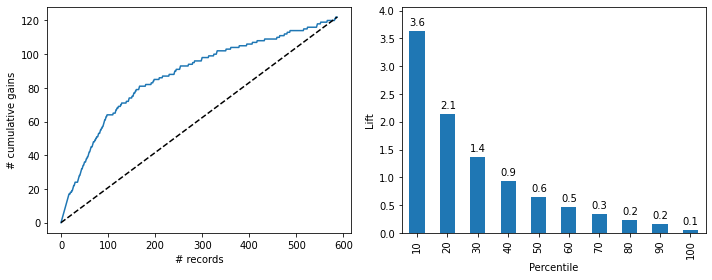

In [ ]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

#### CatBoost
모델 설명 : https://dailyheumsi.tistory.com/136

In [17]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [18]:
import catboost as ctb

model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(train_X_scaled, train_y)



Learning rate set to 0.011777
0:	learn: 0.6838709	total: 48.5ms	remaining: 48.4s
1:	learn: 0.6787790	total: 49.6ms	remaining: 24.8s
2:	learn: 0.6709407	total: 51.7ms	remaining: 17.2s
3:	learn: 0.6646919	total: 53.4ms	remaining: 13.3s
4:	learn: 0.6570777	total: 55.1ms	remaining: 11s
5:	learn: 0.6482008	total: 56.8ms	remaining: 9.4s
6:	learn: 0.6411577	total: 58.5ms	remaining: 8.3s
7:	learn: 0.6336388	total: 60.2ms	remaining: 7.46s
8:	learn: 0.6265727	total: 61.9ms	remaining: 6.81s
9:	learn: 0.6200803	total: 63.2ms	remaining: 6.25s
10:	learn: 0.6128535	total: 64.8ms	remaining: 5.83s
11:	learn: 0.6068864	total: 66.5ms	remaining: 5.48s
12:	learn: 0.6010875	total: 68.2ms	remaining: 5.18s
13:	learn: 0.5944319	total: 69.9ms	remaining: 4.92s
14:	learn: 0.5889385	total: 71.6ms	remaining: 4.7s
15:	learn: 0.5829756	total: 73.3ms	remaining: 4.51s
16:	learn: 0.5775118	total: 75.1ms	remaining: 4.34s
17:	learn: 0.5721529	total: 76.8ms	remaining: 4.19s
18:	learn: 0.5671525	total: 78.5ms	remaining: 4.0

In [19]:
from sklearn import datasets
from sklearn import metrics

expected_y  = valid_y
predicted_y = model_CBC.predict(valid_X_scaled)
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       465
           1       0.85      0.41      0.55       122

    accuracy                           0.86       587
   macro avg       0.86      0.70      0.74       587
weighted avg       0.86      0.86      0.84       587



In [ ]:
classificationSummary(valid_y, predicted_y)

Confusion Matrix (Accuracy 0.8620)

       Prediction
Actual   0   1
     0 456   9
     1  72  50


Catboost 는 기본 파라미터가 기본적으로 최적화가 잘 되어있어서, 파라미터 튜닝에 크게 신경쓰지 않아도 된다고 한다. 

### ✅ 평가지표 부분 복습해서 평가 더 구체적으로 해보기  
### ✅ 전처리 다르게 한 걸로도 다시 평가해보기  
### ✅ scailing 방법도 다르게 해서 다시 평가해보기  

## Test data에 predict해보기

In [30]:
test_raw = pd.read_csv("/content/drive/MyDrive/Sook-Tat/kaggle_project/여행상품/data/test.csv")

In [21]:
test_raw = test_raw.drop(columns=['id'])

In [22]:
test_raw.loc[test_raw['Gender'] == 'Fe Male', 'Gender'] = 'Female'

In [23]:
test_raw.TypeofContact = test_raw.TypeofContact.fillna('Unknown')

In [24]:
test_raw.Age = test_raw.Age.fillna(37)
test_raw.NumberOfFollowups = test_raw.NumberOfFollowups.fillna(4)
test_raw.NumberOfTrips = test_raw.NumberOfTrips.fillna(3)
test_raw.PreferredPropertyStar = test_raw.PreferredPropertyStar.fillna(3)
test_raw.NumberOfChildrenVisiting = test_raw.NumberOfChildrenVisiting.fillna(1)
test_raw.MonthlyIncome = test_raw.MonthlyIncome.fillna(test_raw.MonthlyIncome.mean())
test_raw.DurationOfPitch = test_raw.DurationOfPitch.fillna(test_raw.DurationOfPitch.mean())#DurationOfPitch(9 / 평균 / 중앙값 중 성능 좋은 것으로)

In [25]:
## dummy
test_dums = pd.get_dummies(test_raw, drop_first=True)

In [26]:
## scaling
test_cont_scailed = pd.DataFrame(robustScaler.transform(test_dums[연속형]), columns=[연속형])
test_scaled = pd.concat([test_dums.drop(columns=연속형).reset_index(), test_cont_scailed], axis=1).drop(columns=['index'])

In [ ]:
## predict

In [ ]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CityTier                     2933 non-null   int64  
 1   Passport                     2933 non-null   int64  
 2   OwnCar                       2933 non-null   int64  
 3   TypeofContact_Self Enquiry   2933 non-null   uint8  
 4   TypeofContact_Unknown        2933 non-null   uint8  
 5   Occupation_Large Business    2933 non-null   uint8  
 6   Occupation_Salaried          2933 non-null   uint8  
 7   Occupation_Small Business    2933 non-null   uint8  
 8   Gender_Male                  2933 non-null   uint8  
 9   ProductPitched_Deluxe        2933 non-null   uint8  
 10  ProductPitched_King          2933 non-null   uint8  
 11  ProductPitched_Standard      2933 non-null   uint8  
 12  ProductPitched_Super Deluxe  2933 non-null   uint8  
 13  MaritalStatus_Marr

In [27]:
logit_reg_pred = logit_reg.predict(test_scaled)

predicted_y = model_CBC.predict(test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [31]:
result_ridge = pd.concat([test_raw['id'], pd.DataFrame({'ProdTaken':logit_reg_pred})], axis=1)
result_cbc = pd.concat([test_raw['id'], pd.DataFrame({'ProdTaken':predicted_y})], axis=1)

In [32]:
result_cbc

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,0


In [ ]:
pd.DataFrame(predicted_y)

,0
0,0
1,0
2,0
3,0
4,1
...,...
2928,0
2929,0
2930,0
2931,0


In [38]:
result_ridge.to_csv('/content/drive/MyDrive/Sook-Tat/kaggle_project/여행상품/result_ridge.csv')

In [39]:
result_cbc.to_csv('/content/drive/MyDrive/Sook-Tat/kaggle_project/여행상품/result_cbc.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
expected_y  = valid_y
predicted_y = model_CBC.predict(valid_X_scaled)
print(metrics.classification_report(expected_y, predicted_y))